# **Big Boss India**  -  Statistical Methods for Decision Making



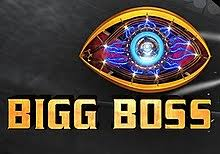

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
import pandas.util.testing as tm
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import warnings
warnings.filterwarnings('ignore')

### Import Big Boss Data Set

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bigg_Boss_India.csv",encoding="ISO-8859-1")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
bb=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bigg_Boss_India.csv",encoding="ISO-8859-1")

In [ ]:
bb.info()

NameError: ignored

## Exploratory Ananlysis

### Shape and DataTypes

In [ ]:
## 24 attributes , 632 observations
bb.shape


(632, 24)

In [ ]:
bb.dtypes.T

Language                               object
Season Number                           int64
Name                                   object
Profession                             object
Gender                                 object
Entry Date                             object
Elimination Date                       object
Elimination Week Number               float64
Wild Card                              object
Season Length                           int64
Number of Housemates                    int64
Season Start Date                      object
Season End Date                        object
Host Name                              object
Guest Host Name                        object
Prize Money (INR)                      object
Broadcasted By                         object
Average TRP                           float64
Number of Evictions Faced             float64
Number of re-entries                  float64
Number of times elected as Captain    float64
Social Media Popularity           

### Data Cleaning (Null Values)

In [ ]:
bb.isnull().values.any()

True

In [ ]:
bb.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                             99
Elimination Date                      500
Elimination Week Number               108
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                         0
Host Name                               0
Guest Host Name                       559
Prize Money (INR)                       9
Broadcasted By                          0
Average TRP                           238
Number of Evictions Faced              18
Number of re-entries                   18
Number of times elected as Captain     33
Social Media Popularity               546
Finalist                                9
Winner                            

In [ ]:
bb.isnull().sum().sum()

2146

In [ ]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bb['Number of Evictions Faced'] = bb['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bb['Number of re-entries'] = bb['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bb['Average TRP'] = bb['Average TRP'].fillna(bb['Average TRP'].mean())

# Filling blank Social Media Popularity values with average
bb['Social Media Popularity'] = bb['Social Media Popularity'].fillna(round(bb['Social Media Popularity'].mean()))

# Filling blank values for Winner with 0
bb['Winner'] = bb['Winner'].fillna(0)

# Filling blank values for Winner with 0
bb['Finalist'] = bb['Finalist'].fillna(0)

# Filling blank values for Number of times elected as Captain with 0
bb['Number of times elected as Captain'] = bb['Number of times elected as Captain'].fillna(0)

# Filling null values for Elimination Week Number 
bb['Elimination Week Number'] = bb['Elimination Week Number'].fillna(bb["Elimination Week Number"].mean())

### Changing the datatypes

In [ ]:
bb = bb.astype({'Elimination Week Number':'int64','Number of Evictions Faced':'int64','Number of re-entries':'int64',
                'Number of times elected as Captain':'int64','Social Media Popularity':'object','Winner':'object',
                'Finalist':'object','Entry Date':'Datetime64','Season Start Date':'Datetime64','Season End Date':'Datetime64'}) 

In [ ]:
bb.dtypes.T

Language                               object
Season Number                           int64
Name                                   object
Profession                             object
Gender                                 object
Elimination Week Number                 int64
Wild Card                              object
Season Length                           int64
Number of Housemates                    int64
Host Name                              object
Guest Host Name                        object
Broadcasted By                         object
Average TRP                           float64
Number of Evictions Faced               int64
Number of re-entries                    int64
Number of times elected as Captain      int64
Social Media Popularity                 int64
Finalist                               object
Winner                                 object
dtype: object

# Statistical Summmary

In [ ]:
# dropping few columns as it is not useful for analysis

bb = bb.drop(['Season Start Date','Season End Date', 'Entry Date','Elimination Date','Prize Money (INR)'], axis = 1)

In [ ]:
bb.describe(include = 'object').T

##The output gives:
##count: number of values other than NaN
##unique: number of unique values present in the variable
##top: most repeated value
##frequency: frequency of most repeated value

,count,unique,top,freq
Language,632,7,Hindi,258
Name,632,625,Vikas Gupta,3
Profession,632,74,Actress,146
Gender,632,3,Female,331
Wild Card,632,2,No,522
Host Name,632,12,Salman Khan,213
Guest Host Name,73,4,Farah Khan,19
Broadcasted By,632,11,Colors,243
Social Media Popularity,632,8,7,566
Finalist,632,2,0,484


In [ ]:
bb.describe().T

,count,mean,std,min,25%,50%,75%,max
Season Number,632.0,4.908228,3.833433,1.00,2.0,4.000000,7.0,14.0
Elimination Week Number,632.0,7.574367,5.501837,0.00,2.0,8.000000,13.0,20.0
Season Length,632.0,102.208861,10.657648,70.00,98.0,105.000000,105.0,140.0
Number of Housemates,632.0,18.303797,2.131074,15.00,17.0,18.000000,20.0,23.0
Average TRP,632.0,6.230635,2.627777,2.72,4.4,6.230635,6.5,15.6
Number of Evictions Faced,632.0,3.968354,2.872176,0.00,1.0,3.000000,6.0,13.0
Number of re-entries,632.0,0.099684,0.325172,0.00,0.0,0.000000,0.0,3.0
Number of times elected as Captain,632.0,0.509494,0.748949,0.00,0.0,0.000000,1.0,5.0


In [ ]:
bb.head(3)

,Language,Season Number,Name,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,10,No,86,15,Arshad Warsi,NaN,Sony TV,2.72,3,0,0,7,0,0
1,Hindi,1,Anupama Verma,Model,Female,5,No,86,15,Arshad Warsi,NaN,Sony TV,2.72,1,0,0,7,0,0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,4,No,86,15,Arshad Warsi,NaN,Sony TV,2.72,1,0,0,7,0,0


In [ ]:
bb.tail(3)

,Language,Season Number,Name,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
629,Malayalam,2,Sooraj,Radio Jockey,Male,8,Yes,105,23,Mohanlal,NaN,Asianet,11.03,2,0,0,7,0,0
630,Malayalam,2,Abhirami Suresh,Actress,Female,0,Yes,105,23,Mohanlal,NaN,Asianet,11.03,3,0,0,7,0,0
631,Malayalam,2,Amrutha Suresh,Singer,Female,0,Yes,105,23,Mohanlal,NaN,Asianet,11.03,3,0,0,7,0,0


# Descriptive Statistics

In [ ]:
bb.columns.values

array(['Language', 'Season Number', 'Name', 'Profession', 'Gender',
       'Elimination Week Number', 'Wild Card', 'Season Length',
       'Number of Housemates', 'Host Name', 'Guest Host Name',
       'Broadcasted By', 'Average TRP', 'Number of Evictions Faced',
       'Number of re-entries', 'Number of times elected as Captain',
       'Social Media Popularity', 'Finalist', 'Winner'], dtype=object)

**Measure of Central Tendency**

In [ ]:
# filter the categorical variables from the data
bb_cat = bb.select_dtypes(include=object)

# calculate the mode
bb_cat.mode().T

## Bimodal and Unimodal

,0,1
Language,Hindi,NaN
Name,Vikas Gupta,NaN
Profession,Films,NaN
Gender,Female,NaN
Wild Card,No,NaN
Host Name,Salman Khan,NaN
Guest Host Name,Farah Khan,Samantha Akkineni
Broadcasted By,Colors,NaN
Social Media Popularity,7,NaN
Finalist,0,NaN


In [ ]:
bb.loc[bb.Name == 'Vikas Gupta'] ## checking why Vikas Gupta name has higher frequency ##

,Language,Season Number,Name,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
191,Hindi,11,Vikas Gupta,Producer,Male,15,No,106,19,Salman Khan,NaN,Colors,7.640000,5,0,2,6,1,0
235,Hindi,13,Vikas Gupta,Producer,Male,13,Yes,140,22,Salman Khan,NaN,Colors,9.060000,0,0,1,7,0,0
252,Hindi,14,Vikas Gupta,Producer,Male,0,Yes,105,22,Salman Khan,NaN,Colors,6.230635,1,3,0,7,0,0


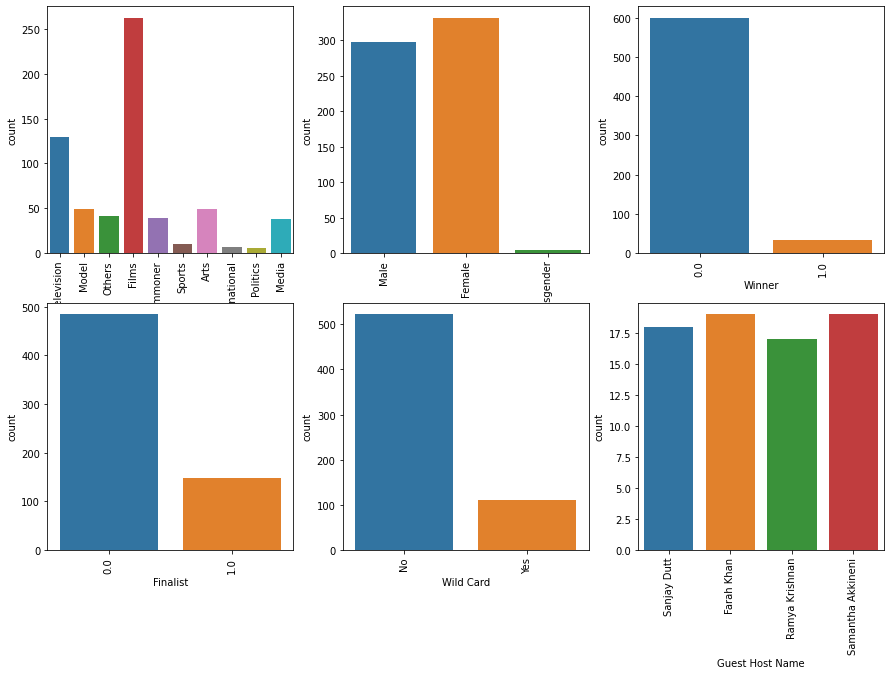

In [ ]:
bb_cat1 = bb_cat[['Profession','Gender','Winner','Finalist','Wild Card', 'Guest Host Name']]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for variable, subplot in zip(bb_cat1, ax.flatten()):
    sns.countplot(bb_cat[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

**Measure of Disperion**

In [ ]:
# filter the numerical variables from the data
bb_num = bb.select_dtypes(include=np.number)



In [ ]:
## Mean ##
bb_num.mean()

Season Number                           4.908228
Elimination Week Number                 7.574367
Season Length                         102.208861
Number of Housemates                   18.303797
Average TRP                             6.230635
Number of Evictions Faced               3.968354
Number of re-entries                    0.099684
Number of times elected as Captain      0.509494
Social Media Popularity                 6.944620
dtype: float64

In [ ]:
## Standard Deviation ##
bb_num.std()

Season Number                          3.833433
Elimination Week Number                5.501837
Season Length                         10.657648
Number of Housemates                   2.131074
Average TRP                            2.627777
Number of Evictions Faced              2.872176
Number of re-entries                   0.325172
Number of times elected as Captain     0.748949
Social Media Popularity                0.610346
dtype: float64

In [ ]:
## Median ##
bb_num.median()

Season Number                           4.000000
Elimination Week Number                 8.000000
Season Length                         105.000000
Number of Housemates                   18.000000
Average TRP                             6.230635
Number of Evictions Faced               3.000000
Number of re-entries                    0.000000
Number of times elected as Captain      0.000000
Social Media Popularity                 7.000000
dtype: float64

**Distribution of Data**

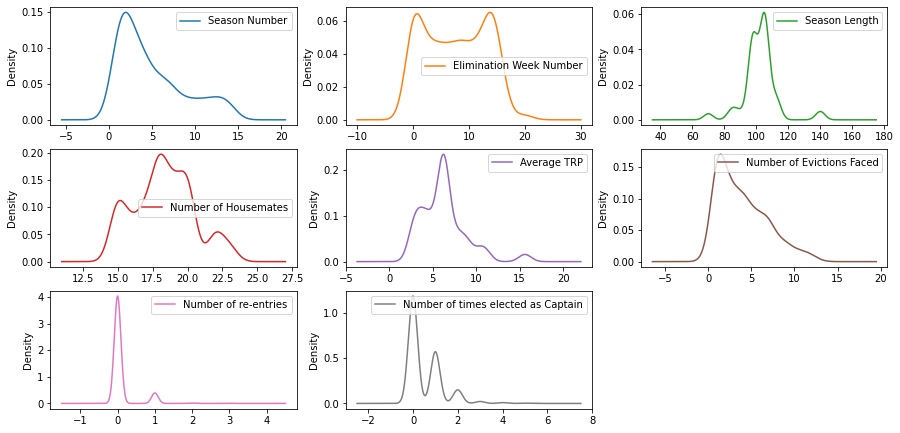

In [ ]:
bb_num.plot(kind='density',subplots=True,sharex=False,layout=(4,3),figsize=(15,10))
plt.show()

**Skewness & Kurtosis**

In [ ]:
bb_num.skew()

Season Number                         0.957377
Elimination Week Number               0.041765
Season Length                         0.678514
Number of Housemates                  0.202793
Average TRP                           1.334841
Number of Evictions Faced             0.835795
Number of re-entries                  3.626119
Number of times elected as Captain    1.738601
Social Media Popularity              -2.278360
dtype: float64

In [ ]:
bb_num.kurt()

Season Number                         -0.211486
Elimination Week Number               -1.297932
Season Length                          5.149473
Number of Housemates                  -0.478670
Average TRP                            2.758878
Number of Evictions Faced             -0.043675
Number of re-entries                  16.117140
Number of times elected as Captain     4.104004
Social Media Popularity               21.110185
dtype: float64

**Data Preperation**

Narrowing of Profession column

In [ ]:
## before narrowing down
bb.groupby(bb.Profession)['Profession'].count()

In [ ]:
# Common people have many professions, so clubbing them into one category
bb.loc[bb['Profession'].str.contains('Commoner'),'Profession']='Commoner'

In [ ]:
bb['Profession'] = bb['Profession'].replace(['Wrestler','Sports Person'],'Sports')
bb['Profession'] = bb['Profession'].replace(['Peagent Winner'],'Model')
bb['Profession'] = bb['Profession'].replace(['Soap Actor','Soap Actress','Comedian','TV Anchor','Video Jockey','Reality Show Alumni'],'Television')
bb['Profession'] = bb['Profession'].replace(['International Star','International star'],'International')
bb['Profession'] = bb['Profession'].replace(['Actress','Actor','Film director','Film Director','Film Critic','Lyricist','Writer'],'Films')
bb['Profession'] = bb['Profession'].replace(['Dancer','Choreographer','Musician','Singer'],'Arts')
bb['Profession'] = bb['Profession'].replace(['News Presenter','Journalist','Social Media Star','Radio Jockey'],'Media')
bb['Profession'] = bb['Profession'].replace(['Politician','Political Analyst'],'Politics')

In [ ]:
counts = bb['Profession'].value_counts()
idx = counts[counts.lt(6)].index
bb.loc[bb['Profession'].isin(idx), 'Profession'] = 'Others'

In [ ]:
## after narrowing down ##
bb.groupby(bb.Profession)['Profession'].count()

Profession
Arts              49
Commoner          39
Films            262
International      7
Media             38
Model             49
Others            42
Politics           6
Sports            10
Television       130
Name: Profession, dtype: int64

# Simulation 

# Central Limit Theorem

In [ ]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()
series1 = bb["Number of Evictions Faced"]


Simulation with sample size = 20 and no of samples = 10

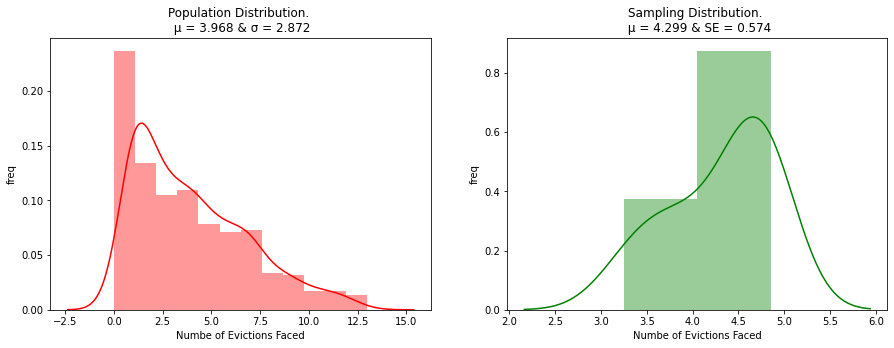

In [ ]:
central_limit_theorem(series1,'Numbe of Evictions Faced',n_samples = 10, sample_size = 20)

Simulation with sample size = 100 and no of samples = 100

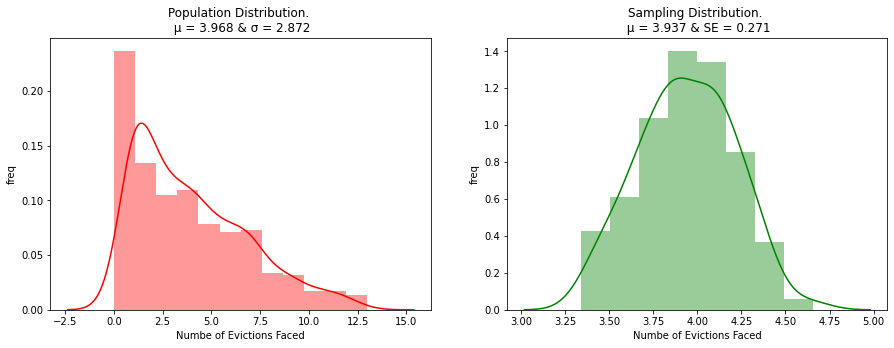

In [ ]:
central_limit_theorem(series1,'Numbe of Evictions Faced',n_samples = 100, sample_size = 100)

# Hypothesis Testing

## Shapiro Test

### Null and Alternate Hypothesis

H0: Number of Evictions Faced follow a Normal distribution

H1: Number of Evictions Faced do not follow a Normal distribution



In [ ]:
n=100
k=100
means=[np.mean(bb["Number of Evictions Faced"].sample(n)) for i in range(k)]

Perform Shapiro Test

In [ ]:
## Shapiro Test ##
from scipy.stats import shapiro
stat, p = shapiro(means)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (do not reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.9751766920089722, p=0.05570291727781296
Sample looks Normal (do not reject H0)


## Chi - Square One Factor

### The Null and Alternative Hypothesis is:

H0: 50% of Females ,40% of Males and 10% Transgender form the participants proportion.

H1: The ratio of participants are different from claimed.

In [ ]:
obs = bb['Gender'].value_counts().values
n=sum(obs)
exp=np.array([n*0.5,n*0.4,n*0.1])

In [ ]:
chi_square_stat, p_value = stats.chisquare(obs, f_exp=exp)
print("Chi-square stat:",chi_square_stat)
print("P-value:",p_value)

Chi-square stat: 63.89319620253165
P-value: 1.335883940757945e-14


Since p-value is less than 0.05 thus we can reject the null hypothesis and conclude that the proportion of gender of the participant doesnt follow the trend projected

## Chi - Square Two Factor 

### The Null and Alternative Hypothesis are:

H0: Finalist is dependent on Gender

H1: FInalist is not dependent on Gender

In [ ]:
pd.crosstab(index= bb['Finalist'],columns=bb['Gender'])

Gender,Female,Male,Transgender
Finalist,,,
0.0,269,211,4
1.0,62,86,0


In [ ]:
quality_array = pd.crosstab(index= bb['Finalist'],columns=bb['Gender'])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)
stats.chi2_contingency(quality_array)

print('Chi-statistic: {} \nP-value: {} \nDegrees of freedom: {}' .format(chi_sq_Stat, p_value,deg_freedom))

Chi-statistic: 10.357088551390824 
P-value: 0.005636205206270326 
Degrees of freedom: 2


### The Null and Alternative Hypothesis are:
H0: Finalist is dependent on Profession

H1: FInalist is not dependent on Profession

Since the p-value(0.0057) is less than 0.05, we reject the null hypothesis. Therefore we can say with 95% confidence that Finalist is not dependent on Gender

In [ ]:
pd.crosstab(index= bb['Finalist'],columns=bb['Profession'])

Profession,Arts,Commoner,Films,International,Media,Model,Others,Politics,Sports,Television
Finalist,,,,,,,,,,
0.0,36,33,188,6,34,40,38,6,7,96
1.0,13,6,74,1,4,9,4,0,3,34


In [ ]:
quality_array = pd.crosstab(index= bb['Finalist'],columns=bb['Profession'])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)
stats.chi2_contingency(quality_array)

print('Chi-statistic: {} \nP-value: {} \nDegrees of freedom: {}' .format(chi_sq_Stat, p_value,deg_freedom))

Chi-statistic: 16.75506004308788 
P-value: 0.052692760613474145 
Degrees of freedom: 9


Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

Therefore we can say with 95% confidence that Finalist is dependent on Profession.

## Kruskal Wallis H Test


### The Null and Alternative Hypothesis is:
H0: Average of TRP is same accross the Language

H1: Average of TRP is different for at least one Language

In [ ]:
alpha=0.05
test_stat, p_value = stats.kruskal(bb[bb['Language'] == 'Tamil']["Average TRP"],
              bb[bb['Language'] == 'Telugu']["Average TRP"],
              bb[bb['Language'] == 'Kannada']["Average TRP"],
              bb[bb['Language'] == 'Bengali']["Average TRP"],
              bb[bb['Language'] == 'Malayalam']["Average TRP"],
              bb[bb['Language'] == 'Hindi']["Average TRP"])

print('P_value for Kruskal : ', p_value)
print('Significance level: ',alpha)

P_value for Kruskal :  8.286927886883681e-68
Significance level:  0.05



Here P value is less than alpha thus we reject null hypothesis. 
We can conclude that average of TRP rating is different for at least one Language

#Part 2

In [ ]:
np.mean(bb["Elimination Week Number"])

9.13549618320609

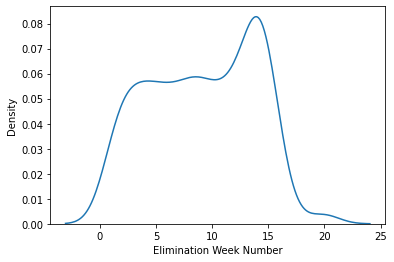

In [ ]:
sns.kdeplot(df["Elimination Week Number"])

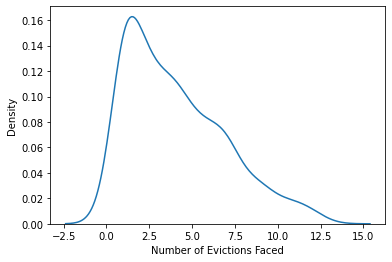

In [ ]:
sns.kdeplot(df["Number of Evictions Faced"])

In [ ]:
stats.shapiro(bb["Number of Evictions Faced"])

(0.9046778082847595, 1.999248882384241e-19)

In [ ]:
# when we see a double peak , is it that these are from 2 different distributions or sample distribution/process
# We can run the t test to see if this is statistical or are they from 2 different distributions
# Null Hypotheses: They are from the same distribution
# Alternate: They are from different distributions

#df_=df["Elimination Week Number"].fillna(np.mean(df["Elimination Week Number"]))
x2 = df["Elimination Week Number"].sample(20)
x1 = df["Elimination Week Number"].sample(20)
t_statistic , P = stats.mannwhitneyu(x1,x2)
print(t_statistic,P)
print("Since the pvalue is greater than 0.05 we conclude that they are from the same distribution and the peaks are just statistical")

158.0 0.130180355407705
Since the pvalue is greater than 0.05 we conclude that they are from the same distribution and the peaks are just statistical


In [ ]:
df_hindi1 = df[df["Language"]== "Hindi"]
df_Kannada = df[df["Language"]== "Kannada"]
df_Telugu = df[df["Language"]== "Telugu"]
df_Tamil = df[df["Language"]== "Tamil"]
df_Marathi = df[df["Language"]== "Marathi"]
df_Bengali = df[df["Language"]== "Bengali"]
df_Malayalam = df[df["Language"]== "Malayalam"]

In [ ]:
df_hindi1["Elimination Week Number"].fillna(np.mean(df_hindi1["Elimination Week Number"]),inplace=True)
df_Tamil["Elimination Week Number"].fillna(np.mean(df_Tamil["Elimination Week Number"]),inplace=True)
df_Kannada["Elimination Week Number"].fillna(np.mean(df_Kannada["Elimination Week Number"]),inplace=True)
df_Bengali["Elimination Week Number"].fillna(np.mean(df_Bengali["Elimination Week Number"]),inplace=True)
df_Malayalam["Elimination Week Number"].fillna(np.mean(df_Malayalam["Elimination Week Number"]),inplace=True)
df_Telugu["Elimination Week Number"].fillna(np.mean(df_Telugu["Elimination Week Number"]),inplace=True)
df_Marathi["Elimination Week Number"].fillna(np.mean(df_Marathi["Elimination Week Number"]),inplace=True)

##Hypothesis -1 Are the variations/mean in Elimination week different for different regions or languages

Null Hypotheses: They are the same


Alternate: They are Different , atleast one is different

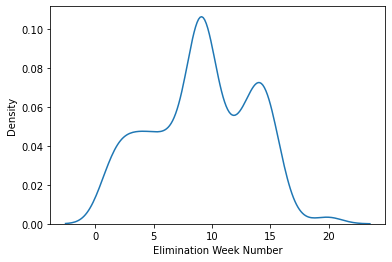

In [ ]:
sns.kdeplot(bb["Elimination Week Number"])

In [ ]:
stats.shapiro(bb["Elimination Week Number"])

(0.96217280626297, 1.0998514599069864e-11)

We concluded after the shapiro test that the Elimination week number is not normally distributed

In [ ]:
#Since it is not normally distributed we use the Kruskal H Test for checking the distributions

test_stat, p_value = stats.kruskal(bb[bb['Language'] == 'Tamil']["Elimination Week Number"],
              bb[bb['Language'] == 'Telugu']["Elimination Week Number"],
              bb[bb['Language'] == 'Kannada']["Elimination Week Number"],
              bb[bb['Language'] == 'Bengali']["Elimination Week Number"],
              bb[bb['Language'] == 'Malayalam']["Elimination Week Number"],
              bb[bb['Language'] == 'Hindi']["Elimination Week Number"])

In [ ]:
print('H-statistic: {} \nP-value: {}' .format(test_stat, p_value))

H-statistic: 2.177640414947859 
P-value: 0.8240590329537104


Since the p value is greater than the significance value 0.05 ,
we fail to reject the null hypothesis, hence, the elimination is the same across diffrent regions 

## Hypotheses 2 Is there a gender bias with respect to elimination week, for Big Boss Hindi?

Null Hypothises- There is a significant link or bias between gender and elimination


Alternate Hypothesis: There is no significance or bias between gender and eleimination week number 

In [ ]:
df_hindi1_Male= df_hindi1[df_hindi1["Gender"]=="Male"]
df_hindi1_Female=df_hindi1[df_hindi1["Gender"]=="Female"]

In [ ]:
df_hindi1_Female.shape

(134, 24)

In [ ]:
pvalue_gender_elimination = stats.mannwhitneyu(df_hindi1_Male["Elimination Week Number"].sample(30),df_hindi1_Female["Elimination Week Number"].sample(30))

In [ ]:
pvalue_gender_elimination  

MannwhitneyuResult(statistic=390.0, pvalue=0.18911674880929885)


Since the P value is greater than the significance  aplha =0.05 , we fail to reject the null hypotheses, hence, there is a bias or dependency between gender and elimination week number

## Hypotheses 3:Is there a link/dependency between gender and the region
Null Hypotheses: Gender and language are dependent

Alternate-There is no statistical dependency between gender and Language

We will use chisquare dependency test for this hypothesis

In [ ]:
gender_language = [[ df_hindi1[df_hindi1["Gender"]=="Male"].Language.count(),df_Tamil[df_Tamil["Gender"]=="Male"].Language.count(),
                    df_Kannada[df_Kannada["Gender"]=="Male"].Language.count(),df_Bengali[df_Bengali["Gender"]=="Male"].Language.count(),
                   df_Telugu[df_Telugu["Gender"]=="Male"].Language.count(),df_Malayalam[df_Malayalam["Gender"]=="Male"].Language.count(),
                   df_Marathi[df_Marathi["Gender"]=="Male"].Language.count()],
                   [df_hindi1[df_hindi1["Gender"]=="Female"].Language.count(),df_Tamil[df_Tamil["Gender"]=="Female"].Language.count(),
                    df_Kannada[df_Kannada["Gender"]=="Female"].Language.count(),df_Bengali[df_Bengali["Gender"]=="Female"].Language.count(),
                   df_Telugu[df_Telugu["Gender"]=="Female"].Language.count(),df_Malayalam[df_Malayalam["Gender"]=="Female"].Language.count(),
                   df_Marathi[df_Marathi["Gender"]=="Female"].Language.count()]]
                    
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(gender_language)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))


Chi-square statistic 0.47162 P value 0.998167 Degrees of freedom 6


Since the p value is greater than the critical value 0.05 , we do not reject the null hypotheses .

Hence, Gender and Language are dependent features statistically 

## Hypotheses 4 - 
Are the No of evictions dependent on the gender 

Null- They are dependent

Alternate Hypothses : They are not dependent on each other

In [ ]:
pvalue_gender_evictions = stats.mannwhitneyu(df_hindi1_Male["Number of Evictions Faced"].sample(30),df_hindi1_Female["Number of Evictions Faced"].sample(30))

In [ ]:
pvalue_gender_evictions

MannwhitneyuResult(statistic=370.5, pvalue=0.11836019382817542)

Since the p value is greater than 0.05 we cannot reject the null hypotheses,
Hence , The Evictions are dependent on the gender

##Hypotheses 5: Are the winners vs gender proportions significantly different

Null Hypotheses: They are the same

Alternate Hypotheses: They are different

In [ ]:
df["Gender"].value_counts()

Female         331
Male           297
Transgender      4
Name: Gender, dtype: int64

In [ ]:
female_winners = df[df['Gender'] == 'Female'].Winner.value_counts()[1]  # number of female winners
male_winners = df[df['Gender'] == 'Male'].Winner.value_counts()[1] # number of male winners
n_females = df.Gender.value_counts()[0] # number of females in the data
n_males = df.Gender.value_counts()[1] 

In [ ]:
print([female_winners, male_winners] , [n_females, n_males])
print(f' Proportion of winners in females, males = {round(9/331,2)}%, {round(24/297,2)}% respectively')

[9, 24] [331, 297]
 Proportion of winners in females, males = 0.03%, 0.08% respectively


In [ ]:
stat, pval = proportions_ztest([female_winners, male_winners] , [n_females, n_males])

In [ ]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. We reject the null hypotheses')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. We fail to reject the null')

With a p-value of 0.0026 the difference is significant. We reject the null hypotheses


Since the p value is less than 0.05 we reject the null hypotheses,

Hence, there is the proportions of gender vary significantly among the winners

#Hypothes 6 : 
## H0 "Elimination Week Number" influence "Number of Evictions Faced"
## H1 "Elimination Week Number" does not influence "Number of Evictions Faced"
##Using - ONE WAY ANOVA



In [ ]:
# Cleaning of data records
pf1=df
# Average TRP Mean values imputation
pf1['Average TRP'] = pf1['Average TRP'].fillna(pf1['Average TRP'].mean())

# Finalist fill null values imputation
pf1['Finalist'] = pf1['Finalist'].fillna(0)

# Number of Evictions Faced Mean values imputation
pf1['Number of Evictions Faced'].fillna(pf1['Number of Evictions Faced'].mean())

# Number of times elected as Captain null values imputation
pf1['Number of times elected as Captain'] = pf1['Number of times elected as Captain'].fillna(0)

# Number of of Housemates as null values imputation
pf1["Number of Housemates"] = pf1["Number of Housemates"].fillna(0)

# Social Media Popularity Mean values imputation
pf1["Social Media Popularity"] = pf1["Social Media Popularity"].fillna(round(pf1["Social Media Popularity"].mean()))

# Elimination Week Number Mean values imputation
pf1["Elimination Week Number"] = pf1["Elimination Week Number"].fillna(pf1["Elimination Week Number"].mean())

In [ ]:
## Numerical columns for Annova hypothesis

pf1_data = pf1[["Elimination Week Number", "Number of Evictions Faced"]]
pf1_data

,Elimination Week Number,Number of Evictions Faced
0,10.000000,3.0
1,5.000000,1.0
2,4.000000,1.0
3,1.000000,1.0
4,12.000000,6.0
...,...,...
627,8.000000,4.0
628,9.135496,0.0
629,8.000000,2.0
630,9.135496,3.0


In [ ]:
# data description used in analysis

pf1_data.describe()

,Elimination Week Number,Number of Evictions Faced
count,632.000000,614.000000
mean,9.135496,4.055375
std,4.292658,2.867981
min,1.000000,0.000000
25%,6.000000,2.000000
50%,9.135496,3.000000
75%,13.000000,6.000000
max,20.000000,13.000000


In [ ]:
# Measures of Central Tendency

# Mean
pf1_data.mean()

Elimination Week Number      9.135496
Number of Evictions Faced    4.055375
dtype: float64

In [ ]:
# Median
pf1_data.median()

Elimination Week Number      9.135496
Number of Evictions Faced    3.000000
dtype: float64

In [ ]:
# Mode
pf1_data.mode()

,Elimination Week Number,Number of Evictions Faced
0,9.135496,1.0


In [ ]:
#  Measures of dispersion

# Variance
pf1_data.var()

Elimination Week Number      18.426909
Number of Evictions Faced     8.225314
dtype: float64

In [ ]:
# Standard Deviation
pf1_data.std()

Elimination Week Number      4.292658
Number of Evictions Faced    2.867981
dtype: float64

In [ ]:
# Presence of Outliers 
mean=pf1_data.mean()
from scipy.stats import trim_mean
trimmed_mean=list(trim_mean(pf1_data,proportiontocut=0.01))
pd.DataFrame({'mean': mean,'trimmed_mean': trimmed_mean})

,mean,trimmed_mean
Elimination Week Number,9.135496,9.109086
Number of Evictions Faced,4.055375,NaN


In [ ]:
# Interquartile Range

qrt1 =pf1_data['Number of Evictions Faced'].quantile(0.25)
qrt3=pf1['Number of Evictions Faced'].quantile(0.75)
IQR = qrt3 - qrt1
outliers=[]

lower_bound=qrt1-(1.5*IQR)
higher_bound=qrt3+(1.5*IQR)

for i in pf1_data['Number of Evictions Faced']:
    if i < lower_bound:
        outliers.append(i)    
for i in pf1_data['Number of Evictions Faced']:
    if i > higher_bound:
        outliers.append(i) 
print(outliers)

[13.0]


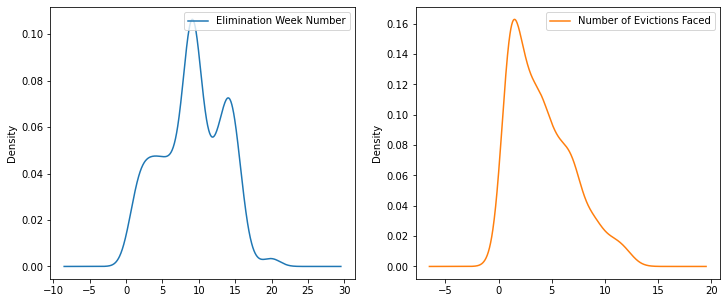

In [ ]:
# kde distribution of data

pf1_data.plot(kind='density',subplots=True,sharex=False,layout=(1,2),figsize=(12,5))
plt.show()

In [ ]:
# Kurtosis for skewness
pf1_data.skew()

Elimination Week Number     -0.103362
Number of Evictions Faced    0.805509
dtype: float64

In [ ]:
pf1_data.kurt()

Elimination Week Number     -0.722060
Number of Evictions Faced   -0.076087
dtype: float64

In [ ]:
pf1_data.corr()

,Elimination Week Number,Number of Evictions Faced
Elimination Week Number,1.000000,0.651989
Number of Evictions Faced,0.651989,1.000000


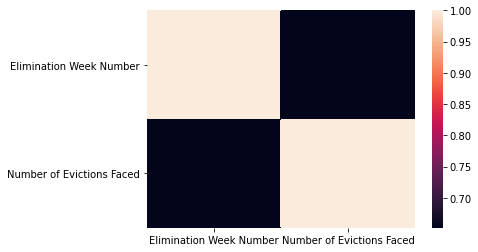

In [ ]:
sns.heatmap(pf1_data.corr())

In [ ]:
# Shapiro

test, p_val = stats.shapiro(pf1_data["Number of Evictions Faced"])
print('P value for Shapiro: ', p_val1)

test, p_val2 = stats.shapiro(pf1_data["Elimination Week Number"])
print('P value for Shapiro: ',p_val2)


P value for Shapiro:  1.0
P value for Shapiro:  1.0998514599069864e-11


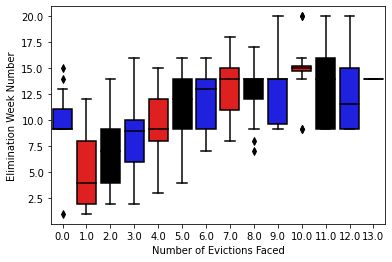

In [ ]:
# For Annova hypotheses
sns.boxplot(x = "Number of Evictions Faced", y = "Elimination Week Number", data = pf1_data,palette=['blue','red','black'])
plt.show()

In [ ]:
#Sample of n=50

ptype1=pf1_data[pf1_data["Number of Evictions Faced"]<5].sample(50,random_state=2)
ptype2=pf1_data[pf1_data["Number of Evictions Faced"]>6].sample(50,random_state=2)
ptype3=pf1_data[pf1_data["Number of Evictions Faced"]<2].sample(50,random_state=2)

In [ ]:
# Normality of data at 95% confidence level

print(stats.shapiro(ptype1["Elimination Week Number"]))
print(stats.shapiro(ptype2["Elimination Week Number"]))
print(stats.shapiro(ptype2["Elimination Week Number"]))

(0.9497615694999695, 0.03335428610444069)
(0.8540376424789429, 1.9935261661885306e-05)
(0.8540376424789429, 1.9935261661885306e-05)


Since p-value is less than 0.05 level of significance we have enough evidence to conclude that the data is not normally distributed

In [ ]:
# Finding the F-stat and F-critical values

crit_val = stats.f.isf(0.05, dfn = 2, dfd = 500)
print("F critical value with 95% confidence:",crit_val)

#Calculating f_statistic and p-value:
f_stat, p_val = stats.f_oneway(ptype1["Elimination Week Number"],ptype2["Elimination Week Number"],ptype3["Elimination Week Number"])

print("F-statistic:",f_stat)

#Calculating p-value
print("P-value:",p_val)

F critical value with 95% confidence: 3.013753005713494
F-statistic: 86.19964526803996
P-value: 1.6954265896568623e-25


## Since F - statistic is greater than F critical value with 95% confidence it falls in the rejection region.So null hypothes is rejected .
## Thus Elimination Week Number does not influence Number of Evictions Faced by a candidate: H1


# 7. Does being a "Finalist" depend on the "Number of times elected as Captain".
## H0 : 'Yes' being a "Finalist" depends on the "Number of times elected as Captain" for house mates

## H1: 'No' being a Finalist depends on the Number of times elected as Captain for house mates

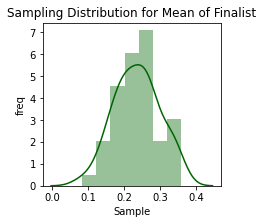

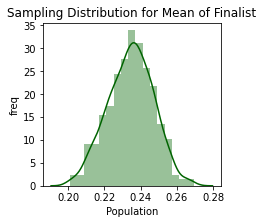

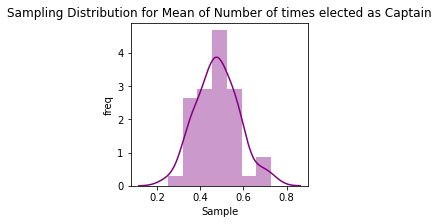

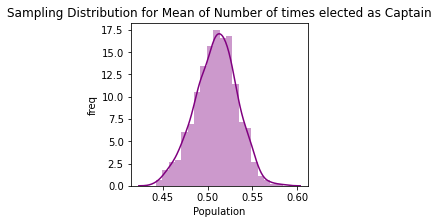

In [ ]:
# Fisrt understanding the data distribution for "Finalist" & "Number of times elected as Captain" are they normally distributed?
import random

## For Finalist
def mean_dist_for_finalist(sample_size,sample_text):
    m={}
    for i in range(sample_size):
        j = np.unique(np.random.randint(0, len(pf1), size = sample_size))
        m[i] = pf1["Finalist"][j].mean()   
        df_x = pd.DataFrame()
        df_x["sample"] = m.keys()   
        df_x["mean"] = m.values() 
    plt.figure(figsize= (7,3))
    plt.subplot(1,2,2)
    sns.distplot(df_x["mean"],color='darkgreen')
    plt.title("Sampling Distribution for Mean of Finalist")
    plt.xlabel(sample_text)
    plt.ylabel('freq')

mean_dist_for_finalist(50,sample_text="Sample")  # For sample size 
mean_dist_for_finalist(632,sample_text="Population") # For population change sample size to population size 

i=0
j=0
## For "Number of times elected as Captain" 
def mean_dist_for_nof_elect_cap(sample_size,sample_text):
    n={}
    for i in range(sample_size):
        j = np.unique(np.random.randint(0, len(pf1), size = sample_size))
        n[i] = pf1["Number of times elected as Captain"][j].mean()   
        df_y = pd.DataFrame()
        df_y["sample"] = n.keys()   
        df_y["mean"] = n.values() 
    plt.figure(figsize= (7,3))
    plt.subplot(1,2,2)
    sns.distplot(df_y["mean"],color='purple')
    plt.title("Sampling Distribution for Mean of Number of times elected as Captain")
    plt.xlabel(sample_text)
    plt.ylabel('freq')

mean_dist_for_nof_elect_cap(50,sample_text="Sample")  # For sample size
mean_dist_for_nof_elect_cap(632,sample_text="Population") # For population change sample size to population size 
plt.show()


### If  sample size is increased to Population the data is normally distributed for both "Number of times elected as Captain" and "Finalist". 

### For discrete varibales we can consider a non-parametric hyptothesis test like Chi-Square test


In [ ]:
# Checking for normality of data at 95% confidence level 
test, p_val1 = stats.shapiro(pf1["Finalist"])
test, p_val2 = stats.shapiro(pf1["Number of times elected as Captain"])

print(' p_val for "Finalist": ',p_val1,'\n','p_val for "Number of times elected as Captain": ',p_val2)


 p_val for "Finalist":  4.831595269161653e-38 
 p_val for "Number of times elected as Captain":  1.0208765095392441e-32


## Since p-value is less than 0.05 level of significance we have enough evidence to conclude that the data is not normally distributed.

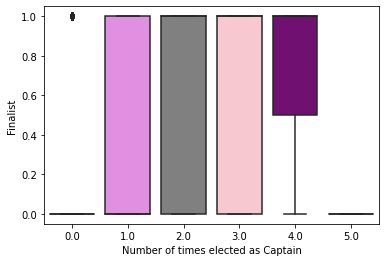

In [ ]:
sns.boxplot(x = "Number of times elected as Captain", y = "Finalist", data = pf1,palette=['purple','violet','grey','pink'])
plt.show()

In [ ]:
# Correlation for proving Hypothesis
pf1["Number of times elected as Captain"].corr(pf1["Finalist"])  # Postive correlation exists

0.37243257805632163

## Postive correlation exists between being a Finalist and being Elected as a Captain.

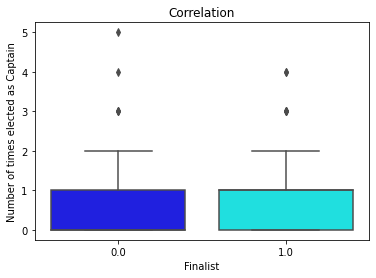

In [ ]:
sns.boxplot(x = "Finalist", y = "Number of times elected as Captain", data = pf1,palette=['blue','cyan'])
plt.title("Correlation")
plt.show()

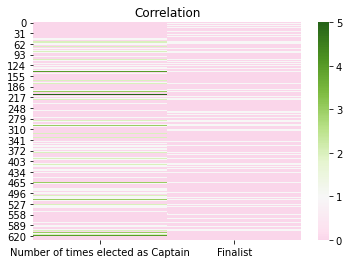

In [ ]:
sns.heatmap(pf1[["Number of times elected as Captain", "Finalist"]],cmap="PiYG",center=1)
plt.title("Correlation")
plt.show()

## Chi Square 2 test for proving the hypotheses
##H0 : Yes:  "Number of times elected as Captain" determines turning a "Finalist" 
##H1 : No:  "Number of times elected as Captain" determines turning a "Finalist" 


In [ ]:
cross_t = pd.crosstab(index= pf1["Number of times elected as Captain"],columns=pf1["Finalist"])
chi_stat, p_val, dof, expected = chi2_contingency(cross_t)

print('p_val:',p_val)
print('chi stat: ', chi_stat)

p_val: 1.0054696062404451e-20
chi stat:  103.4177483533082


In [ ]:
critical = chi2.ppf(p_val, dof)
print('probability= ' , p_val, 'critical= ',critical, 'chi_stat= ', chi_stat)

if abs(chi_stat) >= critical:
	print('(Reject Null H0)')
else:
	print('(Accept Null H0)')
 
# interpreting  p_value

alpha = 1.0 - p_val
print('significance= ',alpha,  'p_valp= ', p_val)

if p_val <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=  1.0054696062404451e-20 critical=  3.2404704083705394e-08 chi_stat=  103.4177483533082
(Reject Null H0)
significance=  1.0 p_valp=  1.0054696062404451e-20
Dependent (reject H0)


## Since p_val is less than Alpha ( significance) H0 is rejected

## "Number of times elected as Captain" does not determine being a "Finalist"

Also because being Finalist is necessary for being a Winner, we can say that since the "Number of times elected as Captain" does not determine being a Finalist the same could be true for the dependencies between the Winner and the "Number of times elected as Captain"

Since there is a strong correlation value between being a "Finalist" and "Winner"

In [ ]:
# Correlation for proving Hypothesis
pf1["Winner"].corr(pf1["Finalist"])  # Strong Postive correlation exists

0.42368872920801176